<a href="https://colab.research.google.com/github/SDGPTeamX/PregRed/blob/ml_umeshika/PregRed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Import libraries**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **Replace missing values**

In [3]:
#read the csv file which is modified in the previous step
df1 = pd.read_csv('/content/TeamX_Modified_Dataset.csv')
df1

,Age,Gravidity,Consanguinity,Rubella Immunization,Had Folic Acid,Subfertility,Blood Pressure,Height,BMI,Cardiac Diseases,Thyroid Diseases,Renal Diseases,Venereal Diseases,Malaria,HIV,Blood Sugar,Haemoglobin,Is the newborn healthy?
0,30,3,No,No,No,No,N,149.0,23.4,No,No,No,No,No,No,135.0,12.0,Yes
1,14,1,No,Yes,No,No,N,159.0,NaN,No,No,No,No,No,No,73.5,11.2,Yes
2,24,2,No,Yes,Yes,No,N,153.0,18.3,No,No,No,No,No,No,90.0,10.0,Yes
3,34,2,No,Yes,Yes,No,HBP1,153.0,18.4,No,No,No,No,No,No,NaN,NaN,No
4,30,2,No,Yes,Yes,No,N,152.0,18.4,No,No,No,No,No,No,90.0,9.7,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2033,22,1,No,Yes,Yes,Yes,N,161.0,23.2,No,No,No,No,No,No,98.0,11.9,No
2034,23,1,No,Yes,No,No,N,156.5,22.2,No,No,No,No,No,No,100.0,12.0,No
2035,33,2,No,Yes,Yes,No,N,150.0,23.6,No,No,No,No,No,No,90.0,11.4,No
2036,26,2,No,Yes,Yes,No,N,154.5,23.4,No,No,No,No,No,No,101.0,12.8,No


In [4]:
#get the mean of the numeric columns
df1_mean = df1.mean(axis=0)
print(df1_mean)

Age             29.056919
Gravidity        2.132483
Height         154.140715
BMI             22.451569
Blood Sugar     95.164232
Haemoglobin     11.575067
dtype: float64


In [5]:
#replace missing numeric values with the mean
df1 = df1.fillna(df1_mean, axis=0)
df1

,Age,Gravidity,Consanguinity,Rubella Immunization,Had Folic Acid,Subfertility,Blood Pressure,Height,BMI,Cardiac Diseases,Thyroid Diseases,Renal Diseases,Venereal Diseases,Malaria,HIV,Blood Sugar,Haemoglobin,Is the newborn healthy?
0,30,3,No,No,No,No,N,149.000000,23.400000,No,No,No,No,No,No,135.000000,12.000000,Yes
1,14,1,No,Yes,No,No,N,159.000000,22.451569,No,No,No,No,No,No,73.500000,11.200000,Yes
2,24,2,No,Yes,Yes,No,N,153.000000,18.300000,No,No,No,No,No,No,90.000000,10.000000,Yes
3,34,2,No,Yes,Yes,No,HBP1,153.000000,18.400000,No,No,No,No,No,No,95.164232,11.575067,No
4,30,2,No,Yes,Yes,No,N,152.000000,18.400000,No,No,No,No,No,No,90.000000,9.700000,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2033,22,1,No,Yes,Yes,Yes,N,161.000000,23.200000,No,No,No,No,No,No,98.000000,11.900000,No
2034,23,1,No,Yes,No,No,N,156.500000,22.200000,No,No,No,No,No,No,100.000000,12.000000,No
2035,33,2,No,Yes,Yes,No,N,150.000000,23.600000,No,No,No,No,No,No,90.000000,11.400000,No
2036,26,2,No,Yes,Yes,No,N,154.500000,23.400000,No,No,No,No,No,No,101.000000,12.800000,No


In [6]:
#save the output as a csv file
df1.to_csv('/content/Colabs_Modified_Replace_Missing_Values.csv', index=False)

In [7]:
#read the csv file which is modified in the previous step
df2 = pd.read_csv('/content/Colabs_Modified_Replace_Missing_Values.csv')
df2

,Age,Gravidity,Consanguinity,Rubella Immunization,Had Folic Acid,Subfertility,Blood Pressure,Height,BMI,Cardiac Diseases,Thyroid Diseases,Renal Diseases,Venereal Diseases,Malaria,HIV,Blood Sugar,Haemoglobin,Is the newborn healthy?
0,30,3,No,No,No,No,N,149.000000,23.400000,No,No,No,No,No,No,135.000000,12.000000,Yes
1,14,1,No,Yes,No,No,N,159.000000,22.451569,No,No,No,No,No,No,73.500000,11.200000,Yes
2,24,2,No,Yes,Yes,No,N,153.000000,18.300000,No,No,No,No,No,No,90.000000,10.000000,Yes
3,34,2,No,Yes,Yes,No,HBP1,153.000000,18.400000,No,No,No,No,No,No,95.164232,11.575067,No
4,30,2,No,Yes,Yes,No,N,152.000000,18.400000,No,No,No,No,No,No,90.000000,9.700000,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2033,22,1,No,Yes,Yes,Yes,N,161.000000,23.200000,No,No,No,No,No,No,98.000000,11.900000,No
2034,23,1,No,Yes,No,No,N,156.500000,22.200000,No,No,No,No,No,No,100.000000,12.000000,No
2035,33,2,No,Yes,Yes,No,N,150.000000,23.600000,No,No,No,No,No,No,90.000000,11.400000,No
2036,26,2,No,Yes,Yes,No,N,154.500000,23.400000,No,No,No,No,No,No,101.000000,12.800000,No


In [8]:
#get the mode of the non-numeric columns
df2_mode = df2.mode(axis=0, numeric_only=False, dropna=True)
df2_mode

,Age,Gravidity,Consanguinity,Rubella Immunization,Had Folic Acid,Subfertility,Blood Pressure,Height,BMI,Cardiac Diseases,Thyroid Diseases,Renal Diseases,Venereal Diseases,Malaria,HIV,Blood Sugar,Haemoglobin,Is the newborn healthy?
0,29,1,No,Yes,Yes,No,N,150.0,20.0,No,No,No,No,No,No,95.164232,11.575067,Yes


In [9]:
#replace missing non-numeric values with the mode
df2 = df2.fillna(df2_mode.iloc[0], axis=0)
df2

,Age,Gravidity,Consanguinity,Rubella Immunization,Had Folic Acid,Subfertility,Blood Pressure,Height,BMI,Cardiac Diseases,Thyroid Diseases,Renal Diseases,Venereal Diseases,Malaria,HIV,Blood Sugar,Haemoglobin,Is the newborn healthy?
0,30,3,No,No,No,No,N,149.000000,23.400000,No,No,No,No,No,No,135.000000,12.000000,Yes
1,14,1,No,Yes,No,No,N,159.000000,22.451569,No,No,No,No,No,No,73.500000,11.200000,Yes
2,24,2,No,Yes,Yes,No,N,153.000000,18.300000,No,No,No,No,No,No,90.000000,10.000000,Yes
3,34,2,No,Yes,Yes,No,HBP1,153.000000,18.400000,No,No,No,No,No,No,95.164232,11.575067,No
4,30,2,No,Yes,Yes,No,N,152.000000,18.400000,No,No,No,No,No,No,90.000000,9.700000,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2033,22,1,No,Yes,Yes,Yes,N,161.000000,23.200000,No,No,No,No,No,No,98.000000,11.900000,No
2034,23,1,No,Yes,No,No,N,156.500000,22.200000,No,No,No,No,No,No,100.000000,12.000000,No
2035,33,2,No,Yes,Yes,No,N,150.000000,23.600000,No,No,No,No,No,No,90.000000,11.400000,No
2036,26,2,No,Yes,Yes,No,N,154.500000,23.400000,No,No,No,No,No,No,101.000000,12.800000,No


In [10]:
#save the output as a csv file
df2.to_csv('/content/Colabs_PregRed_ReplacedMissingValues_Dataset.csv', index=False)

## **Remove duplicated rows**

In [12]:
#read the csv file which is modified in the previous step
df3 = pd.read_csv('/content/Colabs_PregRed_ReplacedMissingValues_Dataset.csv')
df3

,Age,Gravidity,Consanguinity,Rubella Immunization,Had Folic Acid,Subfertility,Blood Pressure,Height,BMI,Cardiac Diseases,Thyroid Diseases,Renal Diseases,Venereal Diseases,Malaria,HIV,Blood Sugar,Haemoglobin,Is the newborn healthy?
0,30,3,No,No,No,No,N,149.000000,23.400000,No,No,No,No,No,No,135.000000,12.000000,Yes
1,14,1,No,Yes,No,No,N,159.000000,22.451569,No,No,No,No,No,No,73.500000,11.200000,Yes
2,24,2,No,Yes,Yes,No,N,153.000000,18.300000,No,No,No,No,No,No,90.000000,10.000000,Yes
3,34,2,No,Yes,Yes,No,HBP1,153.000000,18.400000,No,No,No,No,No,No,95.164232,11.575067,No
4,30,2,No,Yes,Yes,No,N,152.000000,18.400000,No,No,No,No,No,No,90.000000,9.700000,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2033,22,1,No,Yes,Yes,Yes,N,161.000000,23.200000,No,No,No,No,No,No,98.000000,11.900000,No
2034,23,1,No,Yes,No,No,N,156.500000,22.200000,No,No,No,No,No,No,100.000000,12.000000,No
2035,33,2,No,Yes,Yes,No,N,150.000000,23.600000,No,No,No,No,No,No,90.000000,11.400000,No
2036,26,2,No,Yes,Yes,No,N,154.500000,23.400000,No,No,No,No,No,No,101.000000,12.800000,No


In [13]:
#get all the duplicates
dups = df3.duplicated()

In [14]:
#check whether there is any duplicates
print(dups.any())

True


In [15]:
#check what are those duplicated rows
print(df3[dups])

      Age  Gravidity  ... Haemoglobin Is the newborn healthy?
268    22          1  ...   11.000000                     Yes
495    33          1  ...   11.575067                      No
553    26          2  ...   11.000000                     Yes
702    32          2  ...   13.800000                     Yes
709    30          2  ...   11.700000                     Yes
720    22          1  ...   11.200000                     Yes
756    29          2  ...   12.700000                     Yes
1692   35          2  ...   11.900000                      No
1735   25          1  ...   11.575067                      No
1758   34          1  ...   11.575067                      No

[10 rows x 18 columns]


In [16]:
#As there are duplicated rows, delete duplicated rows
df3.drop_duplicates(inplace=True)
df3

,Age,Gravidity,Consanguinity,Rubella Immunization,Had Folic Acid,Subfertility,Blood Pressure,Height,BMI,Cardiac Diseases,Thyroid Diseases,Renal Diseases,Venereal Diseases,Malaria,HIV,Blood Sugar,Haemoglobin,Is the newborn healthy?
0,30,3,No,No,No,No,N,149.000000,23.400000,No,No,No,No,No,No,135.000000,12.000000,Yes
1,14,1,No,Yes,No,No,N,159.000000,22.451569,No,No,No,No,No,No,73.500000,11.200000,Yes
2,24,2,No,Yes,Yes,No,N,153.000000,18.300000,No,No,No,No,No,No,90.000000,10.000000,Yes
3,34,2,No,Yes,Yes,No,HBP1,153.000000,18.400000,No,No,No,No,No,No,95.164232,11.575067,No
4,30,2,No,Yes,Yes,No,N,152.000000,18.400000,No,No,No,No,No,No,90.000000,9.700000,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2033,22,1,No,Yes,Yes,Yes,N,161.000000,23.200000,No,No,No,No,No,No,98.000000,11.900000,No
2034,23,1,No,Yes,No,No,N,156.500000,22.200000,No,No,No,No,No,No,100.000000,12.000000,No
2035,33,2,No,Yes,Yes,No,N,150.000000,23.600000,No,No,No,No,No,No,90.000000,11.400000,No
2036,26,2,No,Yes,Yes,No,N,154.500000,23.400000,No,No,No,No,No,No,101.000000,12.800000,No


In [18]:
#save the output as a csv file
df3.to_csv('/content/Colabs_Pregred_RemovedDuplicatedRows.csv', index=False)

## **Remove columns with single values**

In [26]:
#read the dataset using path and saving it as a dataframe
df4 = pd.read_csv('/content/Weka_Pregred_RemovedOutliers&ExtremeValues.csv')
df4

,Age,Gravidity,Consanguinity,'Rubella Immunization','Had Folic Acid',Subfertility,'Blood Pressure',Height,BMI,'Cardiac Diseases','Thyroid Diseases','Renal Diseases','Venereal Diseases',Malaria,HIV,'Blood Sugar',Haemoglobin,'Is the newborn healthy?'
0,30,3,No,No,No,No,N,149.000000,23.400000,No,No,No,No,No,No,135.000000,12.000000,Yes
1,14,1,No,Yes,No,No,N,159.000000,22.451569,No,No,No,No,No,No,73.500000,11.200000,Yes
2,24,2,No,Yes,Yes,No,N,153.000000,18.300000,No,No,No,No,No,No,90.000000,10.000000,Yes
3,34,2,No,Yes,Yes,No,HBP1,153.000000,18.400000,No,No,No,No,No,No,95.164232,11.575067,No
4,30,2,No,Yes,Yes,No,N,152.000000,18.400000,No,No,No,No,No,No,90.000000,9.700000,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993,22,1,No,Yes,Yes,Yes,N,161.000000,23.200000,No,No,No,No,No,No,98.000000,11.900000,No
1994,23,1,No,Yes,No,No,N,156.500000,22.200000,No,No,No,No,No,No,100.000000,12.000000,No
1995,33,2,No,Yes,Yes,No,N,150.000000,23.600000,No,No,No,No,No,No,90.000000,11.400000,No
1996,26,2,No,Yes,Yes,No,N,154.500000,23.400000,No,No,No,No,No,No,101.000000,12.800000,No


In [27]:
#get the number of unique values in each column
counts = df4.nunique()
print(counts)

Age                           32
Gravidity                      7
Consanguinity                  2
'Rubella Immunization'         2
'Had Folic Acid'               2
Subfertility                   2
'Blood Pressure'               4
Height                        94
BMI                          214
'Cardiac Diseases'             2
'Thyroid Diseases'             2
'Renal Diseases'               1
'Venereal Diseases'            1
Malaria                        1
HIV                            1
'Blood Sugar'                114
Haemoglobin                   67
'Is the newborn healthy?'      2
dtype: int64


In [28]:
#get an array of colums to delete
to_del = [i for i,v in enumerate(counts) if v == 1]
print(to_del)

[11, 12, 13, 14]


In [29]:
#delete unwanted columns
df4.drop(df4.columns[to_del], axis=1, inplace=True)
df4

,Age,Gravidity,Consanguinity,'Rubella Immunization','Had Folic Acid',Subfertility,'Blood Pressure',Height,BMI,'Cardiac Diseases','Thyroid Diseases','Blood Sugar',Haemoglobin,'Is the newborn healthy?'
0,30,3,No,No,No,No,N,149.000000,23.400000,No,No,135.000000,12.000000,Yes
1,14,1,No,Yes,No,No,N,159.000000,22.451569,No,No,73.500000,11.200000,Yes
2,24,2,No,Yes,Yes,No,N,153.000000,18.300000,No,No,90.000000,10.000000,Yes
3,34,2,No,Yes,Yes,No,HBP1,153.000000,18.400000,No,No,95.164232,11.575067,No
4,30,2,No,Yes,Yes,No,N,152.000000,18.400000,No,No,90.000000,9.700000,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993,22,1,No,Yes,Yes,Yes,N,161.000000,23.200000,No,No,98.000000,11.900000,No
1994,23,1,No,Yes,No,No,N,156.500000,22.200000,No,No,100.000000,12.000000,No
1995,33,2,No,Yes,Yes,No,N,150.000000,23.600000,No,No,90.000000,11.400000,No
1996,26,2,No,Yes,Yes,No,N,154.500000,23.400000,No,No,101.000000,12.800000,No


In [30]:
#save the output as a csv file
df4.to_csv('/content/Colabs_Cleaned_Dataset.csv', index=False)

## **Correlation - Filter Method**

In [3]:
#read normalized dataset
df5 = pd.read_csv('/content/Weka_PregRed_Normalized_Modified_Dataset.csv')
df5

,Age,Gravidity,Consanguinity=Yes,'Rubella Immunization=Yes','Had Folic Acid=Yes',Subfertility=Yes,'Blood Pressure',Height,BMI,'Cardiac Diseases=Yes','Thyroid Diseases=Yes','Blood Sugar',Haemoglobin,'Is the newborn healthy?'
0,0.50000,0.333333,0,0,0,0,0.000000,0.414141,0.439344,0,0,0.898990,0.648649,1
1,0.00000,0.000000,0,1,0,0,0.000000,0.616162,0.408248,0,0,0.277778,0.540541,1
2,0.31250,0.166667,0,1,1,0,0.000000,0.494949,0.272131,0,0,0.444444,0.378378,1
3,0.62500,0.166667,0,1,1,0,0.666667,0.494949,0.275410,0,0,0.496608,0.591225,0
4,0.50000,0.166667,0,1,1,0,0.000000,0.474747,0.275410,0,0,0.444444,0.337838,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993,0.25000,0.000000,0,1,1,1,0.000000,0.656566,0.432787,0,0,0.525253,0.635135,0
1994,0.28125,0.000000,0,1,0,0,0.000000,0.565657,0.400000,0,0,0.545455,0.648649,0
1995,0.59375,0.166667,0,1,1,0,0.000000,0.434343,0.445902,0,0,0.444444,0.567568,0
1996,0.37500,0.166667,0,1,1,0,0.000000,0.525253,0.439344,0,0,0.555556,0.756757,0


In [5]:
#getting correlations
cor = df5.corr()
cor

,Age,Gravidity,Consanguinity=Yes,'Rubella Immunization=Yes','Had Folic Acid=Yes',Subfertility=Yes,'Blood Pressure',Height,BMI,'Cardiac Diseases=Yes','Thyroid Diseases=Yes','Blood Sugar',Haemoglobin,'Is the newborn healthy?'
Age,1.000000,0.484270,-0.030595,0.043374,0.036456,0.006464,0.083786,-0.120264,0.149681,0.037379,-0.014316,0.119224,-0.016973,-0.052996
Gravidity,0.484270,1.000000,-0.001869,0.041024,-0.145675,-0.042668,0.030668,-0.137750,0.182065,0.044375,-0.031622,0.079446,-0.078350,0.006422
Consanguinity=Yes,-0.030595,-0.001869,1.000000,0.014880,-0.068355,-0.018462,-0.018768,-0.003101,-0.010500,-0.008717,-0.004102,-0.014944,0.038658,-0.034769
'Rubella Immunization=Yes',0.043374,0.041024,0.014880,1.000000,0.144437,0.012573,-0.021810,-0.018561,0.004180,0.007724,0.003635,0.033749,-0.036017,0.025218
'Had Folic Acid=Yes',0.036456,-0.145675,-0.068355,0.144437,1.000000,-0.037512,-0.004628,-0.022333,-0.039216,0.023480,0.011049,-0.027271,-0.003087,0.005611
Subfertility=Yes,0.006464,-0.042668,-0.018462,0.012573,-0.037512,1.000000,-0.024585,0.010308,0.055939,-0.017818,-0.008385,0.007876,0.011153,-0.157557
'Blood Pressure',0.083786,0.030668,-0.018768,-0.021810,-0.004628,-0.024585,1.000000,-0.001025,0.098054,0.066204,0.026583,0.046733,0.016149,0.037955
Height,-0.120264,-0.137750,-0.003101,-0.018561,-0.022333,0.010308,-0.001025,1.000000,0.008981,-0.047182,0.007435,-0.029437,0.077961,0.106405
BMI,0.149681,0.182065,-0.010500,0.004180,-0.039216,0.055939,0.098054,0.008981,1.000000,0.001342,-0.003020,0.153517,0.111274,0.002318
'Cardiac Diseases=Yes',0.037379,0.044375,-0.008717,0.007724,0.023480,-0.017818,0.066204,-0.047182,0.001342,1.000000,-0.002129,-0.037867,-0.020755,-0.012372


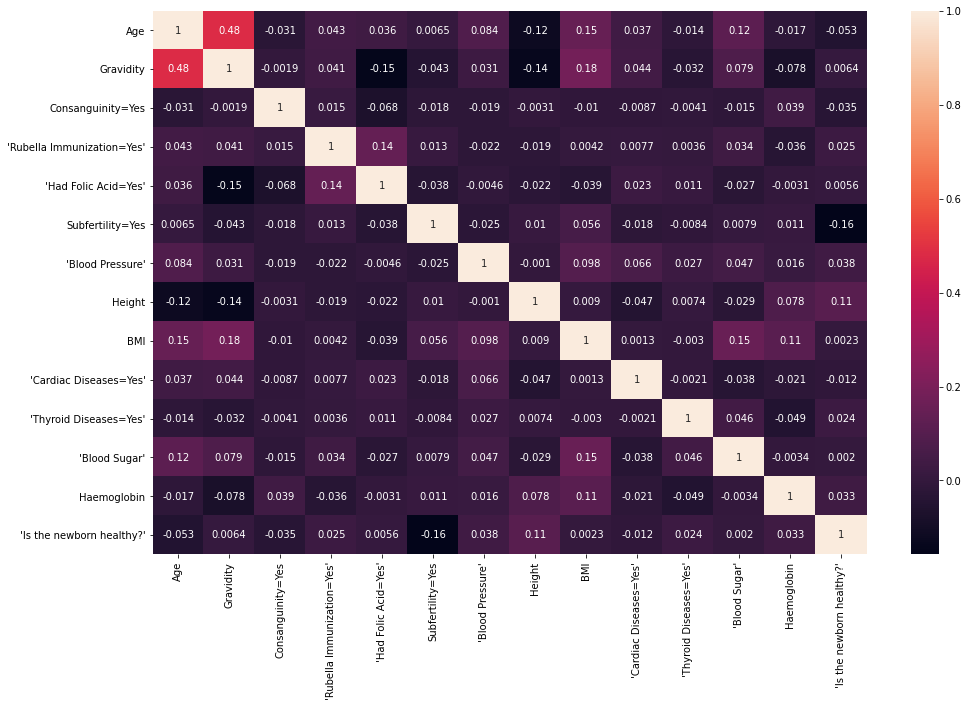

In [6]:
#visualizing the correlations
plt.figure(figsize=(16,10))
sns.heatmap(cor, annot=True)
plt.show()

In [9]:
#Correlation with output variable
cor_target = abs(cor["\'Is the newborn healthy?\'"])

#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.05]
relevant_features

Age                          0.052996
Subfertility=Yes             0.157557
Height                       0.106405
'Is the newborn healthy?'    1.000000
Name: 'Is the newborn healthy?', dtype: float64

In [11]:
#correlation of selected features
print(df5[["Age","Subfertility=Yes"]].corr())
print()
print(df5[["Height","Age"]].corr())
print()
print(df5[["Subfertility=Yes","Height"]].corr())

                       Age  Subfertility=Yes
Age               1.000000          0.006464
Subfertility=Yes  0.006464          1.000000

          Height       Age
Height  1.000000 -0.120264
Age    -0.120264  1.000000

                  Subfertility=Yes    Height
Subfertility=Yes          1.000000  0.010308
Height                    0.010308  1.000000
